In [290]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [291]:
df = pd.read_csv('Breast_Cancer.csv')

In [292]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


<Axes: >

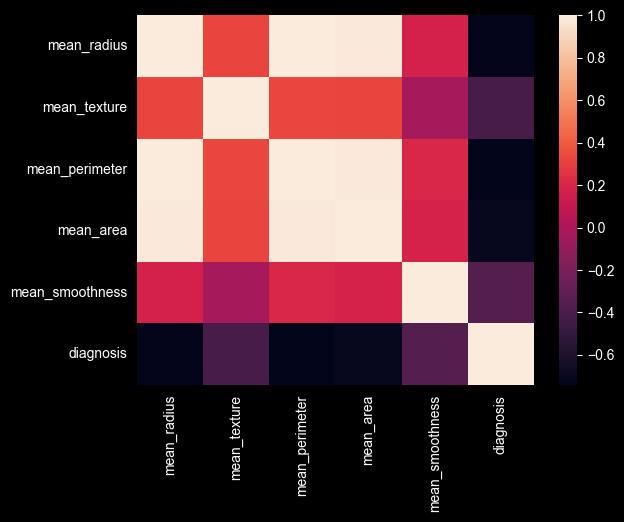

In [293]:
sns.heatmap(df.corr())

In [294]:
X=df.drop(['diagnosis'], axis=1)
y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [295]:
df['diagnosis'].unique()
df['diagnosis'] = df['diagnosis'].map({'NoneCancerous': 0,'Cancerous': 1})

In [296]:
def min_max_train(data):
    df=data.select_dtypes('number').copy()
    dic={}
    for col in df.columns:
        min=df[col].min()
        max=df[col].max()
        if max == min:
            df[col]=0
        else:
            df[col]=(df[col]-min)/(max-min)
        dic.update({col:[max,min]})

    return df,dic

In [297]:
def min_max_test(data,dic):
    df=data.select_dtypes('number').copy()

    for col in dic:
        vals=dic.get(col)
        min=vals[1]
        max=vals[0]
        if max == min:
            df[col]=0
        else:
            df[col]=(df[col]-min)/(max-min)

    return df

In [298]:
X_train,dic=min_max_train(X_train)

In [299]:
X_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
149,0.296244,0.277308,0.283818,0.177894,0.167807
124,0.278123,0.225905,0.269406,0.164378,0.085638
421,0.342769,0.144403,0.355879,0.208401,0.402319
195,0.255595,0.223876,0.243936,0.148460,0.167509
545,0.290367,0.457220,0.277183,0.172831,0.296858
...,...,...,...,...,...
71,0.058622,0.166723,0.074558,0.031580,0.350084
106,0.193398,0.291512,0.191424,0.103879,0.512340
270,0.323179,0.240446,0.299372,0.198318,0.017643
435,0.307997,0.335137,0.305223,0.184116,0.431064


In [300]:
dic

{'mean_radius': [np.float64(28.11), np.float64(7.691)],
 'mean_texture': [np.float64(39.28), np.float64(9.71)],
 'mean_perimeter': [np.float64(188.5), np.float64(48.34)],
 'mean_area': [np.float64(2501.0), np.float64(170.4)],
 'mean_smoothness': [np.float64(0.1634), np.float64(0.06251)]}

In [301]:
X_test = min_max_test(X_test, dic)

In [302]:
def knn_model(row, k_neighbor=3):
    row = np.asarray(row).ravel()
    X_np = np.asarray(X_train)
    distances = np.linalg.norm(X_np - row, axis=1)
    ind_k = np.argsort(distances)[:k_neighbor]
    nearest_classes = y_train.iloc[ind_k]
    counts = nearest_classes.value_counts()
    max_count = counts.max()
    tied = counts[counts == max_count].index
    return sorted(tied)[0]

In [303]:
sample=X_test.sample().values
knn_model(sample,3)

1

In [304]:
y_pred = X_test.apply(lambda row: knn_model(row, k_neighbor=19), axis=1)

In [305]:
y_pred_train = X_train.apply(lambda row: knn_model(row,k_neighbor=19), axis=1)

In [306]:
def conf_matrix(y_true, y_pred):
    return pd.crosstab(y_true, y_pred).to_numpy()

need to make metrics_scores(classification_report) function
Matrix
[True Negative(0), False Positive(0)
False Negative(1), True Positive(1)]

### Classification Metrics Formulas

* **Accuracy**:   $\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$
* **Precision**:   $\text{Precision} = \frac{TP}{TP + FP}$
* **Recall (Sensitivity)**:   $\text{Recall} = \frac{TP}{TP + FN}$
* **F1-Score**:   $\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

In [307]:
print(conf_matrix(y_test, y_pred))

[[ 59   4]
 [  1 107]]


In [308]:
print(conf_matrix(y_train, y_pred_train))

[[127  22]
 [  6 243]]


In [309]:
cm = conf_matrix(y_test, y_pred)

In [310]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [311]:
Accuracy = (TN+TP) / (TP+TN+FP+FN)
Precision = TP / (TP+ FP)
Recall = TP / (TP+FN)
F1_Score = 2 *(Precision * Recall / (Precision + Recall))

In [312]:
print(f'Accuracy:{Accuracy},\nPrecision: {Precision},\nRecall: {Recall},\nF1_Score: {F1_Score}')

Accuracy:0.9707602339181286,
Precision: 0.963963963963964,
Recall: 0.9907407407407407,
F1_Score: 0.9771689497716894


In [313]:
KNN_Test = pd.DataFrame({
    'Breast Cancer': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [Accuracy, Precision, Recall, F1_Score]
}).set_index('Breast Cancer')
(KNN_Test*100).map(lambda x: round(x, 2))

,Value
Breast Cancer,
Accuracy,97.08
Precision,96.40
Recall,99.07
F1 Score,97.72


In [314]:
accuracies = []
Rec = []
Prec = []
F1_S = []
Acc = []
k_values = range(1, min(30, len(X_train) + 1)) # Test k from 1 up to a reasonable limit, ensuring it doesn't exceed training samples

for k in k_values:
    y_pred_k = X_test.apply(lambda row: knn_model(row, k_neighbor=k), axis=1)
    cm = conf_matrix(y_test, y_pred_k)
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TP = cm[1,1]
    Accuracy = (TN+TP) / (TP+TN+FP+FN)
    Precision = TP / (TP+ FP)
    F1_Score = 2 *(Precision * Recall / (Precision + Recall))
    Recall = TP / (TP+FN)
    Rec.append(Recall)
    Prec.append(Precision)
    F1_S.append(F1_Score)
    Acc.append(Accuracy)
    accuracies.append(Recall)

# Find the optimal k
optimal_k_index = accuracies.index(max(accuracies))
optimal_k = k_values[optimal_k_index]

print(f"Accuracies for k values from {min(k_values)} to {max(k_values)}: {accuracies}")
print(f"The optimal k value is {optimal_k} with an accuracy of {max(accuracies):.4f}")

Accuracies for k values from 1 to 29: [np.float64(0.9351851851851852), np.float64(0.8796296296296297), np.float64(0.9537037037037037), np.float64(0.9351851851851852), np.float64(0.9629629629629629), np.float64(0.9537037037037037), np.float64(0.9722222222222222), np.float64(0.9444444444444444), np.float64(0.9629629629629629), np.float64(0.9629629629629629), np.float64(0.9722222222222222), np.float64(0.9722222222222222), np.float64(0.9722222222222222), np.float64(0.9722222222222222), np.float64(0.9814814814814815), np.float64(0.9814814814814815), np.float64(0.9814814814814815), np.float64(0.9814814814814815), np.float64(0.9907407407407407), np.float64(0.9814814814814815), np.float64(0.9907407407407407), np.float64(0.9907407407407407), np.float64(0.9907407407407407), np.float64(0.9907407407407407), np.float64(0.9907407407407407), np.float64(0.9814814814814815), np.float64(0.9814814814814815), np.float64(0.9814814814814815), np.float64(0.9814814814814815)]
The optimal k value is 19 with an

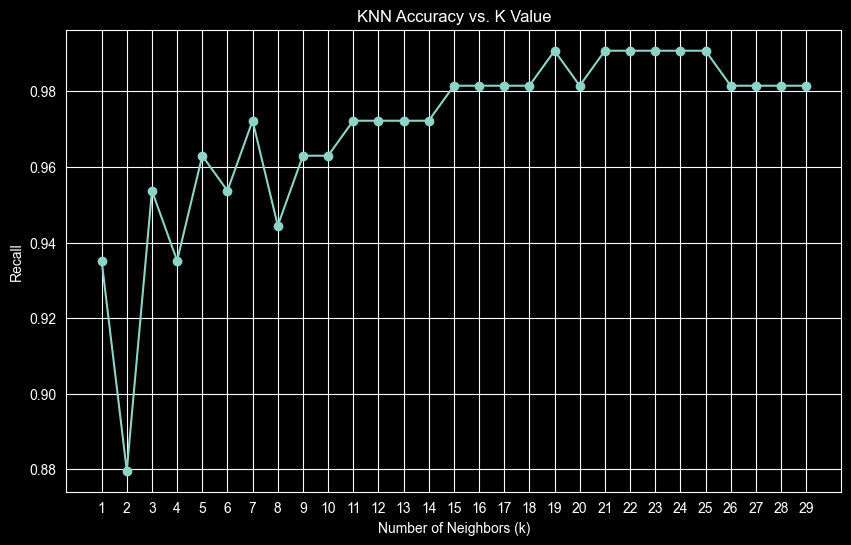

Accuracy vs. K value plot displayed successfully.


In [315]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Recall')
plt.xticks(list(k_values))
plt.grid(True)
plt.show()

print("Accuracy vs. K value plot displayed successfully.")

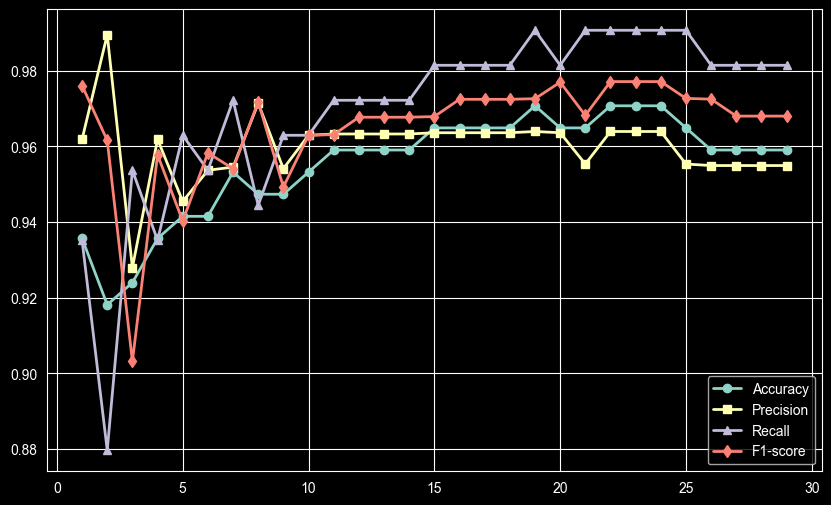

In [316]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, Acc, marker='o', label='Accuracy', linewidth=2)
plt.plot(k_values, Prec, marker='s', label='Precision', linewidth=2)
plt.plot(k_values, Rec, marker='^', label='Recall', linewidth=2)
plt.plot(k_values, F1_S, marker='d', label='F1-score', linewidth=2)
plt.legend(loc='lower right')
plt.show()


In [317]:
accuracies = []
Rec = []
Prec = []
F1_S = []
Acc = []
k_values = range(1, min(30, len(X_train) + 1)) # Test k from 1 up to a reasonable limit, ensuring it doesn't exceed training samples

for k in k_values:
    y_pred_k = X_train.apply(lambda row: knn_model(row, k_neighbor=k), axis=1)
    cm = conf_matrix(y_train, y_pred_k)
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TP = cm[1,1]
    Accuracy = (TN+TP) / (TP+TN+FP+FN)
    Precision = TP / (TP+ FP)
    F1_Score = 2 *(Precision * Recall / (Precision + Recall))
    Recall = TP / (TP+FN)
    Rec.append(Recall)
    Prec.append(Precision)
    F1_S.append(F1_Score)
    Acc.append(Accuracy)
    accuracies.append(Recall)

# Find the optimal k
optimal_k_index = accuracies.index(max(accuracies))
optimal_k = k_values[optimal_k_index]

print(f"Accuracies for k values from {min(k_values)} to {max(k_values)}: {accuracies}")
print(f"The optimal k value is {optimal_k} with an accuracy of {max(accuracies):.4f}")

Accuracies for k values from 1 to 29: [np.float64(1.0), np.float64(0.8995983935742972), np.float64(0.963855421686747), np.float64(0.9357429718875502), np.float64(0.9558232931726908), np.float64(0.9317269076305221), np.float64(0.9518072289156626), np.float64(0.9437751004016064), np.float64(0.9518072289156626), np.float64(0.9477911646586346), np.float64(0.9518072289156626), np.float64(0.9397590361445783), np.float64(0.9598393574297188), np.float64(0.9558232931726908), np.float64(0.9759036144578314), np.float64(0.9678714859437751), np.float64(0.9678714859437751), np.float64(0.9678714859437751), np.float64(0.9759036144578314), np.float64(0.9718875502008032), np.float64(0.9759036144578314), np.float64(0.9678714859437751), np.float64(0.9759036144578314), np.float64(0.9759036144578314), np.float64(0.9759036144578314), np.float64(0.9718875502008032), np.float64(0.9718875502008032), np.float64(0.9718875502008032), np.float64(0.9759036144578314)]
The optimal k value is 1 with an accuracy of 1.00

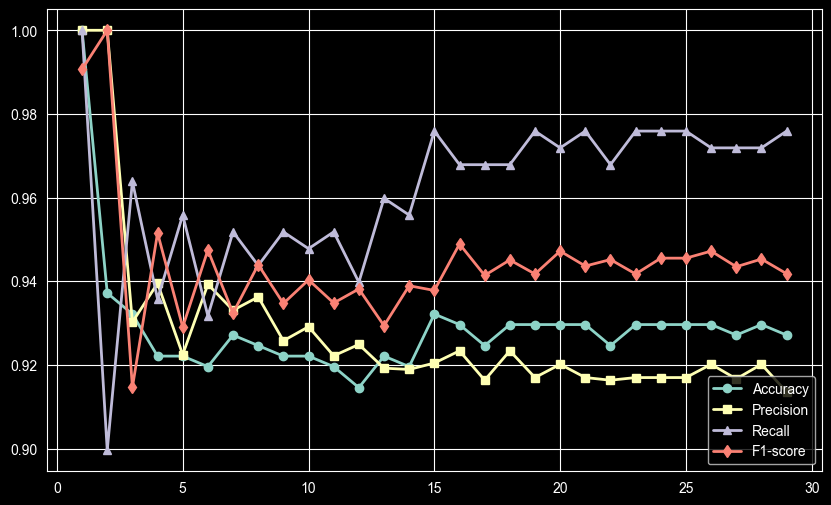

In [318]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, Acc, marker='o', label='Accuracy', linewidth=2)
plt.plot(k_values, Prec, marker='s', label='Precision', linewidth=2)
plt.plot(k_values, Rec, marker='^', label='Recall', linewidth=2)
plt.plot(k_values, F1_S, marker='d', label='F1-score', linewidth=2)
plt.legend(loc='lower right')
plt.show()

In [319]:
cm = conf_matrix(y_train, y_pred_train)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
Accuracy = (TN+TP) / (TP+TN+FP+FN)
Precision = TP / (TP+ FP)
Recall = TP / (TP+FN)
F1_Score = 2 *(Precision * Recall / (Precision + Recall))
print(f'Accuracy:{Accuracy},\nPrecision: {Precision},\nRecall: {Recall},\nF1_Score: {F1_Score}')
KNN_Train = pd.DataFrame({
    'Breast Cancer': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [Accuracy, Precision, Recall, F1_Score]
}).set_index('Breast Cancer')
(KNN_Train*100).map(lambda x: round(x, 2))

Accuracy:0.9296482412060302,
Precision: 0.9169811320754717,
Recall: 0.9759036144578314,
F1_Score: 0.9455252918287937


,Value
Breast Cancer,
Accuracy,92.96
Precision,91.70
Recall,97.59
F1 Score,94.55
